<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/voting_classifier_soft_and_hard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [68]:
data=load_iris()

df = pd.read_csv("iris.csv")

In [69]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [71]:
df=df.iloc[:,0:]

In [72]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [73]:
df.shape

(150, 5)

In [74]:
encoder=LabelEncoder()
df['variety']= encoder.fit_transform(df['variety'])

In [38]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


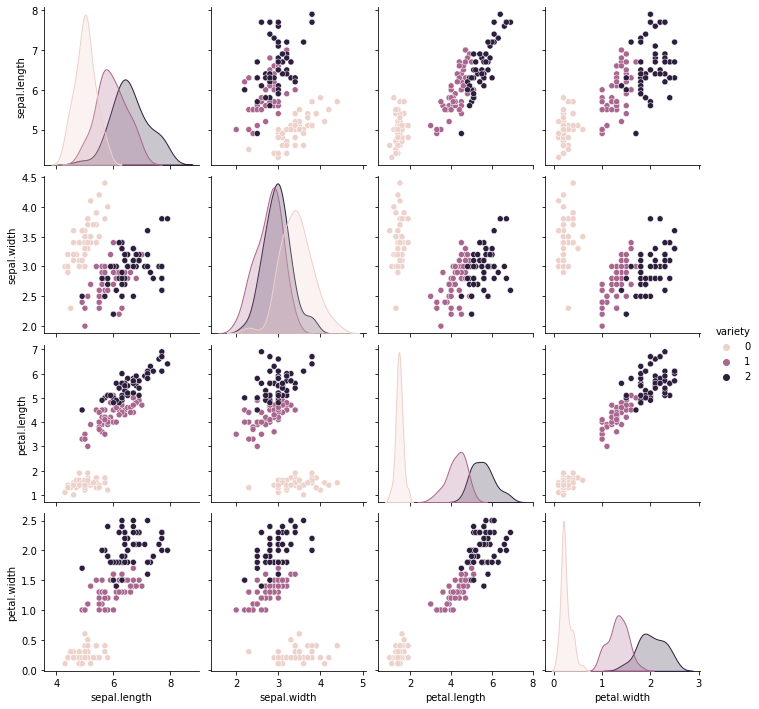

In [75]:
sns.pairplot( df,hue='variety',)

In [76]:
new_df=df[df['variety']!=0][['sepal.length'	,'sepal.width','variety']]

In [77]:
new_df.head()

,sepal.length,sepal.width,variety
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [78]:
new_df.shape

(100, 3)

In [79]:
X=new_df.iloc[:,0:2]
y=new_df.iloc[:,-1]

In [80]:

clf1=LogisticRegression()
clf2=KNeighborsClassifier()
clf3=RandomForestClassifier()

In [81]:
estimators=[('lr',clf1),('knn',clf2),('rf',clf3)]

In [82]:
for estimator in estimators:
  #X=cross_val_score( estimator[1],x,y,cv=10, scoring='accuracy')
  x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
  print(estimator[0],np.round(np.mean(x),2))



lr 0.75
knn 0.61
rf 0.6


In [85]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.68


In [94]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.67
